In [42]:
%matplotlib inline
%autoreload 2 

In [18]:
from __future__ import (division, absolute_import,
                        print_function, unicode_literals)

In [33]:
import george
import pandas as pd
from george.kernels import (KappaKappaExpSquaredKernel, 
                            Gamma1Gamma1ExpSquaredKernel,
                            KappaGamma1ExpSquaredKernel,
                            ExpSquaredKernel)

In [43]:
import sys
sys.path.append("../")
import sample_and_fit_gp as fit
import diag_plots as plot

In [21]:
truth = (0.5, .5)  # 0.5 = inv_lambda, 1.0 = beta
spacing = 0.1
rng = (0, 1.0)

# coords = [[i, 0] for 
KKkernel = KappaKappaExpSquaredKernel
SqExkernel = ExpSquaredKernel

In [49]:
data = \
    fit.generate_2D_data(truth, spacing, KKkernel, rng=rng)

In [23]:
ExpSqdata = \
    fit.generate_2D_data(truth, spacing, SqExkernel, rng=rng)

In [47]:
coords, psi, psi_err = ExpSqdata

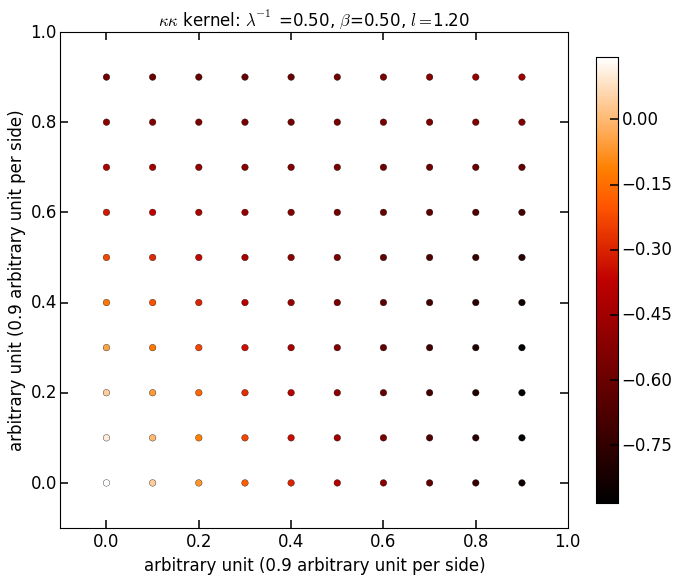

In [48]:
plot.plot_2D_gp_samples(psi, coords, 8, rng[1], truth=truth,
                       kernel_name=r"$\kappa\kappa$")

In [26]:
coords, psi, psi_err = data

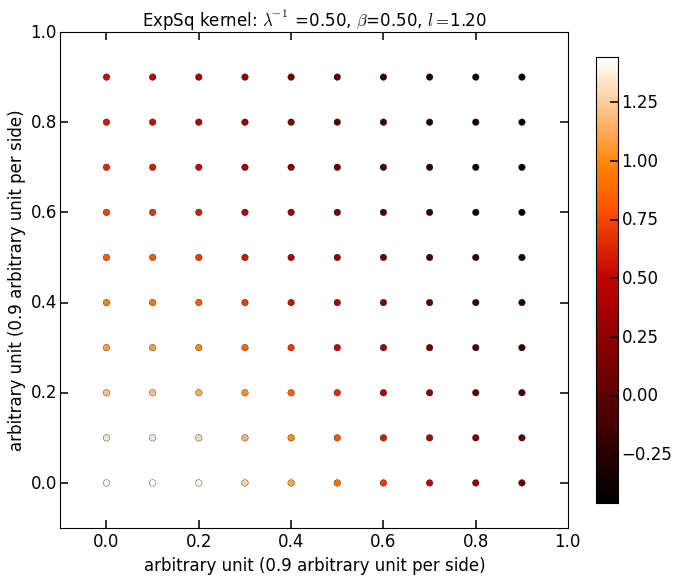

In [27]:
plot.plot_2D_gp_samples(psi, coords, 8, rng[1], truth=truth)

In [51]:
%time sampler, p0 = fit.fit_gp(np.log((0.5, 0.5)), data)

Initial guesses were [ 0.49999997  0.49999975]
Initial guesses were [ 0.49999957  0.4999998 ]
Initial guesses were [ 0.49999945  0.4999995 ]
Initial guesses were [ 0.50000041  0.50000066]
Initial guesses were [ 0.49999986  0.50000045]
Initial guesses were [ 0.49999961  0.49999987]
Initial guesses were [ 0.5000004   0.49999963]
Initial guesses were [ 0.50000052  0.49999998]
Running burn-in with length 1000
Running second burn-in with length 1000
Running production chain with length 5000
the optimized p0 values are 
[[-0.6703395  -0.95718089]
 [-1.22709131 -0.98227885]
 [-1.09758352 -0.95524718]
 [-0.54315591 -0.80842206]
 [-1.13071306 -0.96035954]
 [-0.79728585 -0.81973588]
 [-0.38699069 -0.81638026]
 [-0.34641385 -0.79969193]]
CPU times: user 49.6 s, sys: 457 ms, total: 50.1 s
Wall time: 52.1 s


In [29]:
np.log((0.5, 1))

array([-0.69314718,  0.        ])

burn in seems sufficient .... 

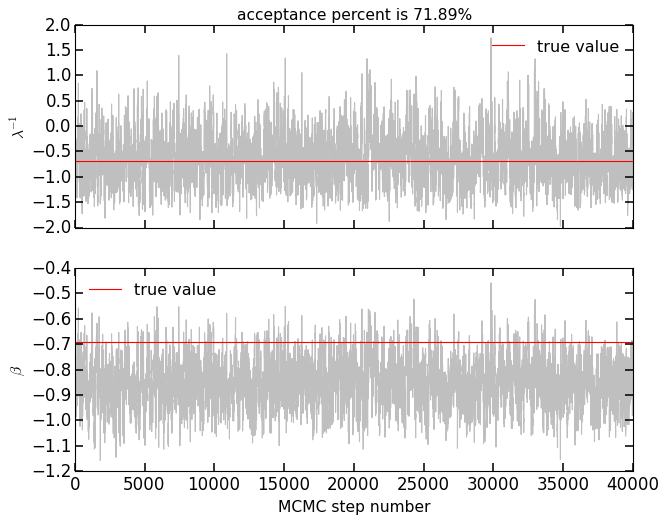

In [53]:
plot.trace_plot(sampler, labels=[r"$\lambda^{-1}$", r"$\beta$"],
                truth=np.log(truth))

N_bins = knuth
Optimization terminated successfully.
         Current function value: -29901.664507
         Iterations: 23
         Function evaluations: 62
N_bins = knuth
Optimization terminated successfully.
         Current function value: -27879.488823
         Iterations: 17
         Function evaluations: 48


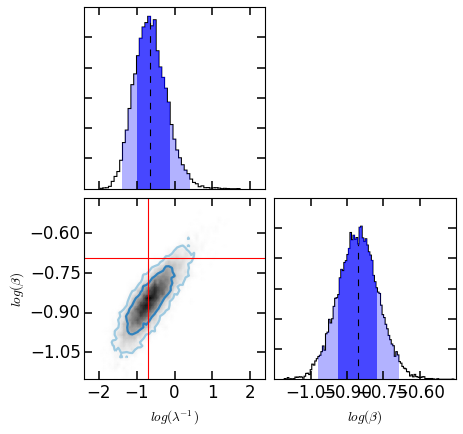

In [54]:
_  = plot.N_by_N_lower_triangle_plot(sampler.flatchain.transpose(), 
                                     0.05, [0, 1],
                                     struth=np.log(truth), 
                                     axlabels=
                                     [r"$log(\lambda^{-1})$", 
                                      r"$log(\beta)$"])